In [1]:
# Import all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\MAMATHA\Desktop\Fraud.csv', low_memory=False)
df.tail(5)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Checking Missing Values

In [5]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [6]:
fra = df['isFraud'].value_counts()
fra

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
imbalance = fra/len(df.index)
imbalance

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

It seems the ratio of Fraud(~0.13%) to Not Fraud is very low which indicates Unbalanced Data.

In [8]:
# Count the occurrences of isflaggedfraud 
fra_1= df['isFlaggedFraud'].value_counts()
fra_1 

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [9]:
fraud_ratio =fra_1/len(df.index)
fraud_ratio

0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64

In [10]:
(df.groupby('type')['isFraud']
     .agg(['count', 'mean'])
     .sort_values('count', ascending=False)
     .rename(columns={'mean':'fraction of positives'}))

,count,fraction of positives
type,,
CASH_OUT,2237500,0.001840
PAYMENT,2151495,0.000000
CASH_IN,1399284,0.000000
TRANSFER,532909,0.007688
DEBIT,41432,0.000000


Fraud is present only in two categories in Transfer and Cash out.

In [11]:
# the set-column shows the time in hours. Do a modulo-24 transform
df['step'] = np.mod(df['step'], 24)

In [12]:
fraudby_type = df.groupby("type")["isFraud"].count()
fraudby_type

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: isFraud, dtype: int64

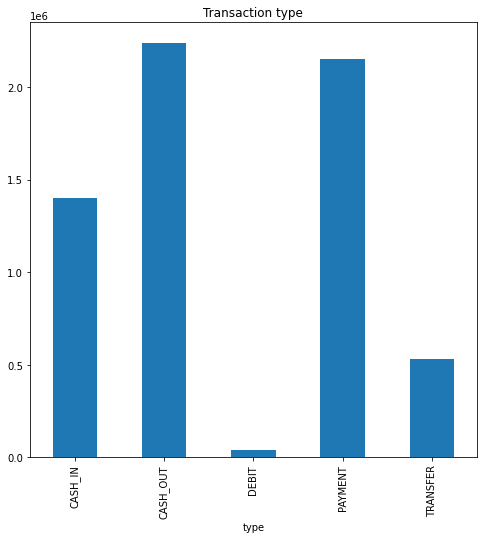

In [13]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
fraudby_type.plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

# Find how features are relevant to each other

In [14]:
from collections import Counter

step_list = list(df.loc[df.isFraud == 1].step.values)

step_counted_list = Counter(step_list)
step_counted_list.most_common(20)

[(10, 375),
 (2, 372),
 (8, 368),
 (5, 366),
 (1, 358),
 (6, 358),
 (14, 353),
 (17, 353),
 (22, 351),
 (21, 347),
 (13, 346),
 (16, 345),
 (18, 343),
 (19, 342),
 (9, 341),
 (15, 341),
 (20, 340),
 (12, 339),
 (7, 328),
 (3, 326)]

In [15]:
type_list = list(df.loc[df.isFraud == 1].type.values)

type_counted_list = Counter(type_list)
type_counted_list.most_common(20)

[('CASH_OUT', 4116), ('TRANSFER', 4097)]

In [16]:
amount_list = list(df.loc[df.isFraud == 1].amount.values)

amount_counted_list = Counter(amount_list)
amount_counted_list.most_common(20)

[(10000000.0, 287),
 (0.0, 16),
 (429257.45, 4),
 (1165187.89, 4),
 (181.0, 2),
 (2806.0, 2),
 (20128.0, 2),
 (1277212.77, 2),
 (35063.63, 2),
 (25071.46, 2),
 (235238.66, 2),
 (1096187.24, 2),
 (963532.14, 2),
 (14949.84, 2),
 (18627.02, 2),
 (10539.37, 2),
 (22877.0, 2),
 (2930418.44, 2),
 (169941.73, 2),
 (13707.11, 2)]

In [17]:
nameOrig_list = list(df.loc[df.isFraud == 1].nameOrig.values)

nameOrig_counted_list = Counter(nameOrig_list)
nameOrig_counted_list.most_common(20)

[('C1305486145', 1),
 ('C840083671', 1),
 ('C1420196421', 1),
 ('C2101527076', 1),
 ('C137533655', 1),
 ('C1118430673', 1),
 ('C749981943', 1),
 ('C1334405552', 1),
 ('C467632528', 1),
 ('C1364127192', 1),
 ('C1635772897', 1),
 ('C669700766', 1),
 ('C1275464847', 1),
 ('C13692003', 1),
 ('C1872047468', 1),
 ('C1499825229', 1),
 ('C1093223281', 1),
 ('C77163673', 1),
 ('C1440057381', 1),
 ('C430329518', 1)]

In [18]:
oldbalanceOrg_list = list(df.loc[df.isFraud == 1].oldbalanceOrg.values)

oldbalanceOrg_counted_list = Counter(oldbalanceOrg_list)
oldbalanceOrg_counted_list.most_common(20)

[(10000000.0, 142),
 (0.0, 41),
 (429257.45, 4),
 (1165187.89, 4),
 (181.0, 2),
 (2806.0, 2),
 (20128.0, 2),
 (1277212.77, 2),
 (35063.63, 2),
 (25071.46, 2),
 (235238.66, 2),
 (1096187.24, 2),
 (963532.14, 2),
 (14949.84, 2),
 (18627.02, 2),
 (10539.37, 2),
 (22877.0, 2),
 (2930418.44, 2),
 (169941.73, 2),
 (13707.11, 2)]

In [19]:
newbalanceOrig_list = list(df.loc[df.isFraud == 1].newbalanceOrig.values)

newbalanceOrig_counted_list = Counter(newbalanceOrig_list)
newbalanceOrig_counted_list.most_common(20)

[(0.0, 8053),
 (19585040.37, 3),
 (10399045.08, 3),
 (17316255.05, 3),
 (4953893.08, 2),
 (1343002.08, 2),
 (536624.41, 2),
 (4892193.09, 2),
 (3576297.1, 2),
 (353874.22, 2),
 (2542664.27, 2),
 (3441041.46, 2),
 (3171085.59, 2),
 (5674547.89, 2),
 (2930418.44, 1),
 (442917.67, 1),
 (298767.61, 1),
 (1861008.32, 1),
 (9887819.06, 1),
 (8594065.09, 1)]

In [20]:
nameDest_list = list(df.loc[df.isFraud == 1].nameDest.values)

nameDest_counted_list = Counter(nameDest_list)
nameDest_counted_list.most_common(20)

[('C410033330', 2),
 ('C803116137', 2),
 ('C904300960', 2),
 ('C1013511446', 2),
 ('C2020337583', 2),
 ('C200064275', 2),
 ('C185805228', 2),
 ('C52390890', 2),
 ('C935310781', 2),
 ('C1827219533', 2),
 ('C104038589', 2),
 ('C1259079602', 2),
 ('C475338087', 2),
 ('C1981613973', 2),
 ('C644163395', 2),
 ('C1366192319', 2),
 ('C1325541393', 2),
 ('C1601170327', 2),
 ('C1656842502', 2),
 ('C967226405', 2)]

In [21]:
oldbalanceDest_list = list(df.loc[df.isFraud == 1].oldbalanceDest.values)

oldbalanceDest_counted_list = Counter(oldbalanceDest_list)
oldbalanceDest_counted_list.most_common(20)

[(0.0, 5351),
 (21182.0, 1),
 (26202.0, 1),
 (6268.0, 1),
 (102.0, 1),
 (31140.0, 1),
 (9083.76, 1),
 (132382.57, 1),
 (18161.79, 1),
 (147251.58, 1),
 (3616012.1, 1),
 (13010502.78, 1),
 (31002.0, 1),
 (98152.0, 1),
 (101976.0, 1),
 (10097.0, 1),
 (6244.44, 1),
 (36275.0, 1),
 (11170.0, 1),
 (3382.84, 1)]

In [22]:
newbalanceDest_list = list(df.loc[df.isFraud == 1].newbalanceDest.values)

newbalanceDest_counted_list = Counter(newbalanceDest_list)
newbalanceDest_counted_list.most_common(20)

[(0.0, 4091),
 (10000000.0, 53),
 (127905.82, 2),
 (429257.45, 2),
 (1064995.85, 2),
 (1165187.89, 2),
 (12145.85, 1),
 (9291619.62, 1),
 (2444985.19, 1),
 (7550.03, 1),
 (34155.22, 1),
 (132842.64, 1),
 (235238.66, 1),
 (1096187.24, 1),
 (1095914.71, 1),
 (33111.63, 1),
 (165878.6, 1),
 (10539.37, 1),
 (22877.0, 1),
 (9941904.21, 1)]

In [23]:
isFlaggedFraud_list = list(df.loc[df.isFraud == 1].isFlaggedFraud.values)

isFlaggedFraud_counted_list = Counter(isFlaggedFraud_list)
isFlaggedFraud_counted_list.most_common(20)

[(0, 8197), (1, 16)]

Feature Selection - Conclusions

Features:
1. step : Include this feature as the data is distributed in many step values.

2. type : Include this feature with only records in type as 'CASH_OUT' and 'TRANSFER.'

3. amount: Include this feature. High and low value amount as 10000000.0 and 0.0 denotes a high chance of fraud.

4. nameOrig and nameDest : Drop these features as there is no important info

5. oldbalanceOrig : Include this feature. You could see that in almost all fraudulent transactions, 'oldbalanceOrig' and 'amount' has the same value. This is a strong indicator of a fraudulent transaction.

6. newbalanceOrig : Include this feature. For most of the fraudulent transactions, 'newbalanceOrig' = 0 

7. oldbalanceDest : Include this feature. Value of 'oldbalanceDest' is zero for nearly half of the fraudulent transaction.

In [24]:
#Since fraud has occured for type TRANSFER AND CASHOUT
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
X.shape

(2770409, 11)

In [25]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [26]:
# Removing Unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)
X.shape

(2770409, 9)

# Data Preprocessing and Feature Engineering

In [27]:
#Adding New Features to Dataset
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X.shape

(2770409, 11)

In [28]:
#One Hot Encoding For Categorical Variable Type
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)
X.tail(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
6362615,23,1,339682.13,339682.13,0.0,0.00,339682.13,1,0,0.0,0.000000e+00
6362616,23,0,6311409.28,6311409.28,0.0,0.00,0.00,1,0,0.0,6.311409e+06
6362617,23,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,0.0,1.000000e-02
6362618,23,0,850002.52,850002.52,0.0,0.00,0.00,1,0,0.0,8.500025e+05
6362619,23,1,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0,0.0,9.313226e-10


# Plotting the correlation between features

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

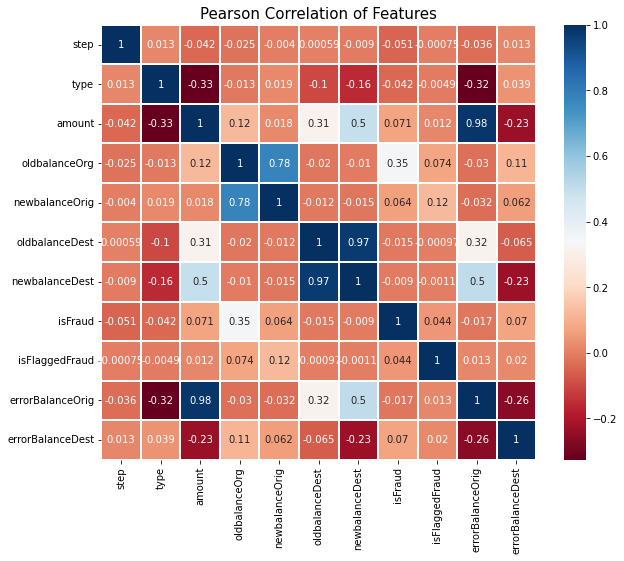

In [29]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', size=15)
sns.heatmap(X.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Here we see that the different variables are not very correlated to each other. So dropping of correlated variables are not required.

In [30]:
Y = X['isFraud'] # Target Variable

X = X.drop(['isFraud'], axis = 1) # REmoving target variable
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [31]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [32]:
Y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [34]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2216327, 10)
Shape of y_train:  (2216327,)
Shape of x_test:  (554082, 10)
Shape of y_test:  (554082,)


In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Building

We are dealing with a highly imbalanced binary classification problem. So we have to select:

1.An appropriate Machine learning algorithm

2.How to deal with the class imbalance

3.The selection of the metric for which we are optimizing.


It is a classification algorithm for Machine Learning which is used to predict categorical dependent variables likelihood. The dependent variable in logistic regression is a binary variable that contains data encoded as either 1 (yes, success, etc.) or 0 (no, failure, etc.). P(Y=1) is predicted by the logistic regression model as a function of X. Logistic Regression used cost function, which can be  described as 'Sigmoid  Function' we  use Sigmoid  Function  to map expected values to probability. The classifier to give us a set of probability-based outputs or groups when we move the inputs through a prediction function and return a probability score of 0 to 1.

Logistic regression is a well-established statistical method for predicting binomial or  multinomial  outcomes.   Binomial  Logistic  Regression  algorithm  is  limited  to  models where the target field a binary field.This type of machine learning algorithm looks for correlation between fraud occurrences and variables included in the dataset to make a prediction between  "fraud" or "no fraud". 

Accounting for Class Imbalance: There are several methods for dealing with class imbalance. 

The LogisticRegression class provides the class_weight argument that can be specified as a model hyperparameter.

Here I am using the 'class_weight' hyper-parameter of the LogisticRegression algorithm to account for the class imbalance. 

Accuracy Score: This is the usual metric which predicts the overall accuracy of the model.

In [36]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression
weights = (Y == 0).sum() / ((Y == 1).sum())

model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(x_train, y_train)

LogisticRegression(class_weight=336.3199805186899)

In [37]:
# Obtain model predictions
predicted = model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predicted)
print(accuracy)

0.9983666677495389


In the Confusion Matrix below, the forward diagonal represents the correcly classified cases while the reverse diagonal shows the incorrectly classified classes.
The model managed to correctly find 834 True Frauds while causing inconvenience to only 93 good customers. From the metrics above, we see that the model is very promising to be productionized in most of the cases.

In [39]:
# Print the classifcation report and confusion matrix
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score,  precision_recall_curve, average_precision_score

print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.90      0.51      0.65      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.75      0.82    554082
weighted avg       1.00      1.00      1.00    554082

Confusion matrix:
 [[552343     93]
 [   812    834]]


Extracting Features: Feature extraction basically works on extracting the information of each and every thread associated with a payment.

In [40]:
columns=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','errorBalanceOrig','errorBalanceDest']
feature_importance=pd.DataFrame(data={
    'Feature':columns,
    'Importance':model.coef_[0]
})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
feature_importance

,Feature,Importance
3,oldbalanceOrg,7.139326
9,errorBalanceDest,2.717163
5,oldbalanceDest,1.420278
7,isFlaggedFraud,1.146880
0,step,-0.638808
1,type,-0.641853
6,newbalanceDest,-2.657052
4,newbalanceOrig,-4.862712
2,amount,-19.036122
8,errorBalanceOrig,-22.181842


The larger the coefficient value (both in the positive and negative direction), the greater the effect of the corresponding feature on the outcome. From the graph above, we can see that the attributes such as 'errorBalanceOrig' and 'oldbalanceOrg' are significant, as they have high importance score.

Oldbalanceorg: This will be the initial balance that the customer has generated.This can be one of the key factors that impacts result.

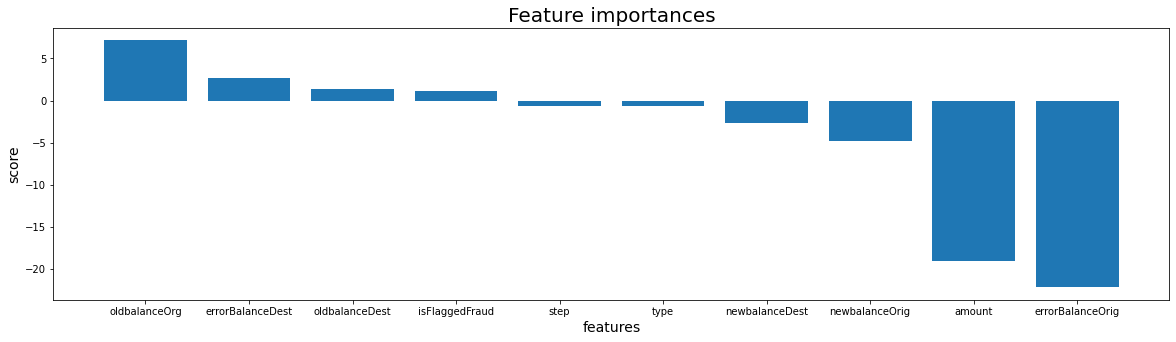

In [41]:
plt.figure(figsize=(20,5))
plt.bar(x=feature_importance['Feature'],height=feature_importance['Importance'])
plt.title("Feature importances",size=20)
plt.ylabel("score",size=14)
plt.xlabel("features",size=14)
plt.show()

Companies can take a collaborative approach, wherein the fraudulent customers profiles are shared to a pooled database that can be accessed for greater good.Based on a variety of parameters such as fraud history, location companies can assign their risk score to each profile.In addition to real-time and historical data points, machine learning algorithms can detect and prevent highly probable fraudulent transactions from being approved, while simultaneously reducing the number of false positives.However, with these measures, the probability of onboarding a fraudulent customer is reduced significantly!